# 1.Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import (
    accuracy_score, classification_report, recall_score, confusion_matrix,
    roc_auc_score, precision_score, f1_score, roc_curve, auc
)
from sklearn.preprocessing import OrdinalEncoder

from catboost import CatBoostClassifier, Pool

In [2]:
# Load Data Sets 
df = pd.read_csv("D:\DL-Projects\Telco-Customer-Churn-Project\data\Telco-Customer-Churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 2. Data Preprocessing 

In [4]:
# Check the Info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Check Missing Value 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### No missing value in datasets is good 

In [6]:
categorical_columns = df.select_dtypes(include=['object', 'category'])
for feature in categorical_columns:
    print(f"Column: {feature} -> {df[feature].unique()}")
    print(f"Unique Number: {df[feature].nunique()}")
    print(f"{df[feature].value_counts()} \n")

Column: customerID -> ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique Number: 7043
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64 

Column: gender -> ['Female' 'Male']
Unique Number: 2
Male      3555
Female    3488
Name: gender, dtype: int64 

Column: Partner -> ['Yes' 'No']
Unique Number: 2
No     3641
Yes    3402
Name: Partner, dtype: int64 

Column: Dependents -> ['No' 'Yes']
Unique Number: 2
No     4933
Yes    2110
Name: Dependents, dtype: int64 

Column: PhoneService -> ['No' 'Yes']
Unique Number: 2
Yes    6361
No      682
Name: PhoneService, dtype: int64 

Column: MultipleLines -> ['No phone service' 'No' 'Yes']
Unique Number: 3
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

Column: InternetService -> [

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['tenure'] * df['MonthlyCharges'], inplace=True)
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)

df['MultipleLines'] = df['MultipleLines'].replace('No phone service','No')
columns_to_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for column in columns_to_replace:
    df[column] = df[column].replace('No internet service', 'No')
    
# Changing categorical variables to numeric:
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})

In [8]:
# Save the edited data
df.to_parquet('churn_data_regulated.parquet')

In [9]:
# Explore categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category'])
for feature in categorical_columns:
    print(f"Column: {feature} -> {df[feature].unique()}")
    print(f"Unique Number: {df[feature].nunique()}")
    print(f"{df[feature].value_counts()} \n")


Column: customerID -> ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique Number: 7043
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64 

Column: gender -> ['Female' 'Male']
Unique Number: 2
Male      3555
Female    3488
Name: gender, dtype: int64 

Column: SeniorCitizen -> [0 1]
Unique Number: 2
0    5901
1    1142
Name: SeniorCitizen, dtype: int64 

Column: Partner -> ['Yes' 'No']
Unique Number: 2
No     3641
Yes    3402
Name: Partner, dtype: int64 

Column: Dependents -> ['No' 'Yes']
Unique Number: 2
No     4933
Yes    2110
Name: Dependents, dtype: int64 

Column: PhoneService -> ['No' 'Yes']
Unique Number: 2
Yes    6361
No      682
Name: PhoneService, dtype: int64 

Column: MultipleLines -> ['No' 'Yes']
Unique Number: 2
No     4072
Yes    2971
Name: MultipleLines, dtype: in

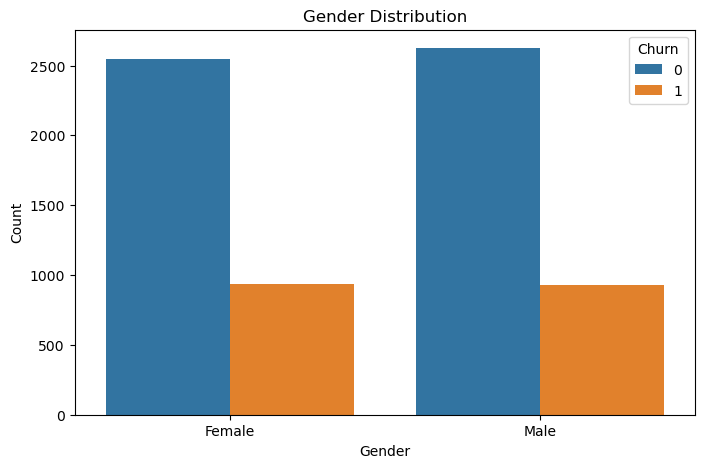

In [10]:
# Univariate Analysis

# Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=df, hue='Churn')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [11]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

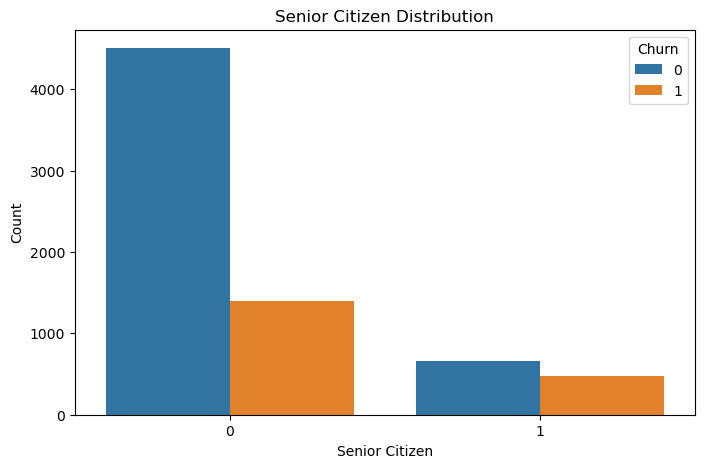

In [12]:
# Senior Citizen Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='SeniorCitizen', data=df, hue='Churn')
plt.title('Senior Citizen Distribution')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.show()

In [13]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Text(0, 0.5, 'Count')

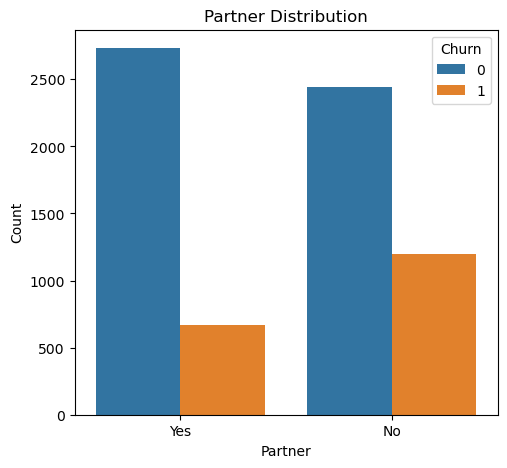

In [14]:
# Partner and Dependents Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Partner', data=df, hue='Churn')
plt.title('Partner Distribution')
plt.xlabel('Partner')
plt.ylabel('Count')

In [15]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

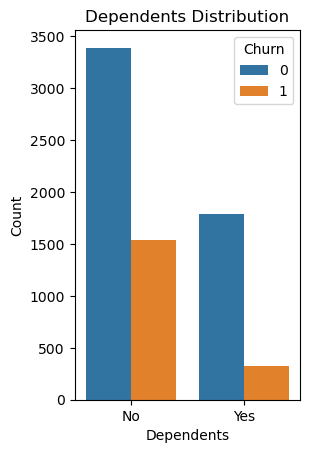

In [16]:
plt.subplot(1, 2, 2)
sns.countplot(x='Dependents', data=df, hue='Churn')
plt.title('Dependents Distribution')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()

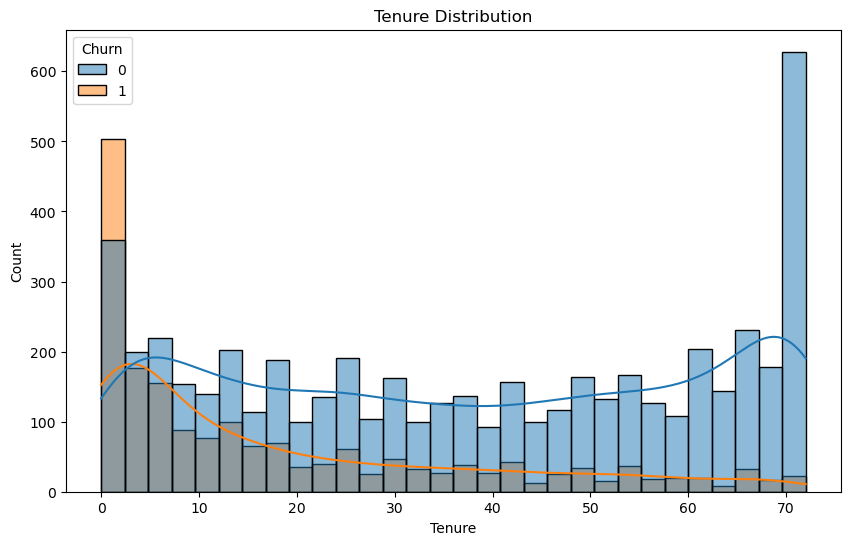

In [17]:
# Tenure Distribution
plt.figure(figsize=(10, 6))
sns.histplot(x='tenure', data=df, bins=30, kde=True, hue='Churn')
plt.title('Tenure Distribution')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

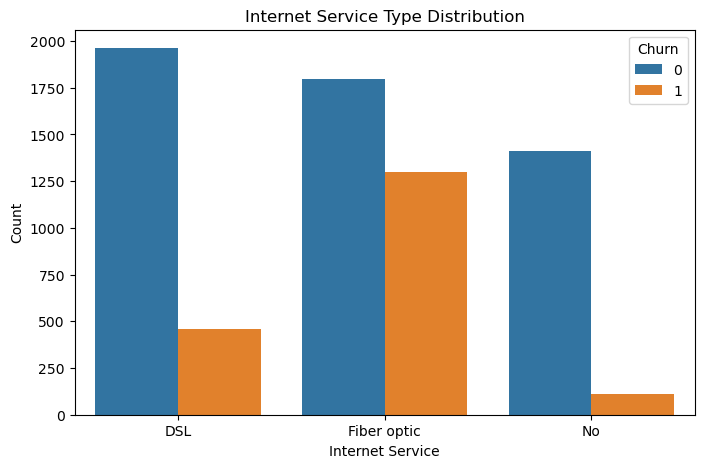

In [18]:
# Internet Service Type Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='InternetService', data=df, hue='Churn')
plt.title('Internet Service Type Distribution')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

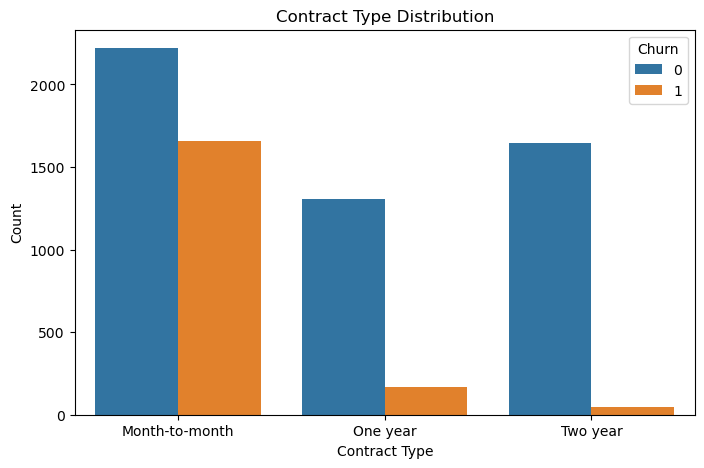

In [19]:
# Contract Type Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', data=df, hue='Churn')
plt.title('Contract Type Distribution')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

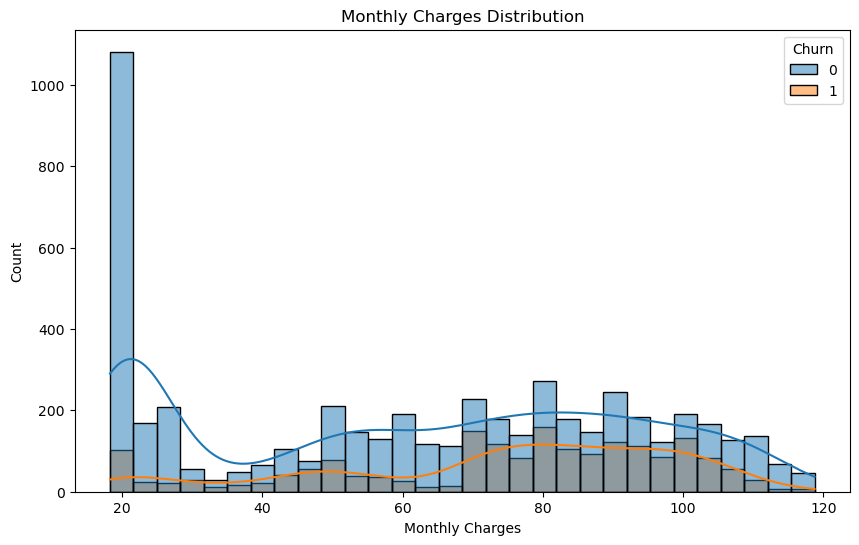

In [20]:
# Monthly Charges Distribution
plt.figure(figsize=(10, 6))
sns.histplot(x='MonthlyCharges', data=df, bins=30, kde=True, hue='Churn')
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

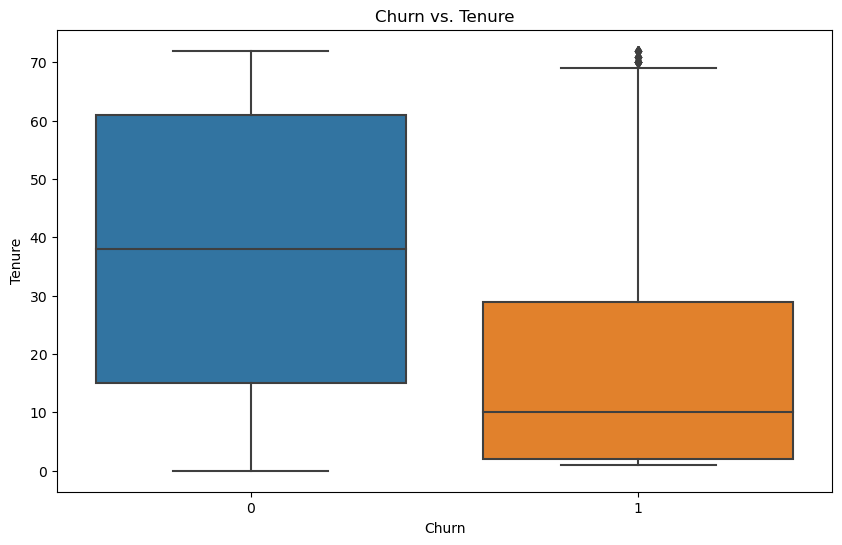

In [21]:
# Bivariate Analysis

# Churn vs. Tenure
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Churn vs. Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

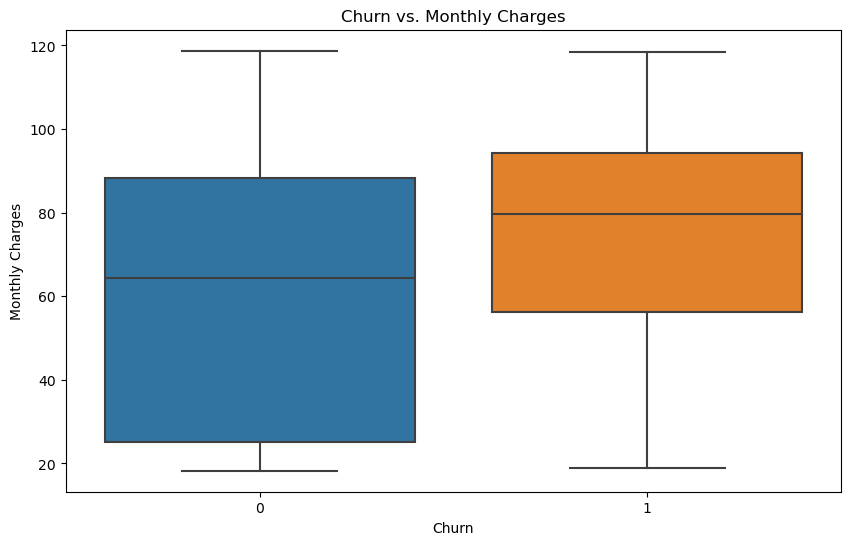

In [22]:
# Churn vs. Monthly Charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Churn vs. Monthly Charges')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

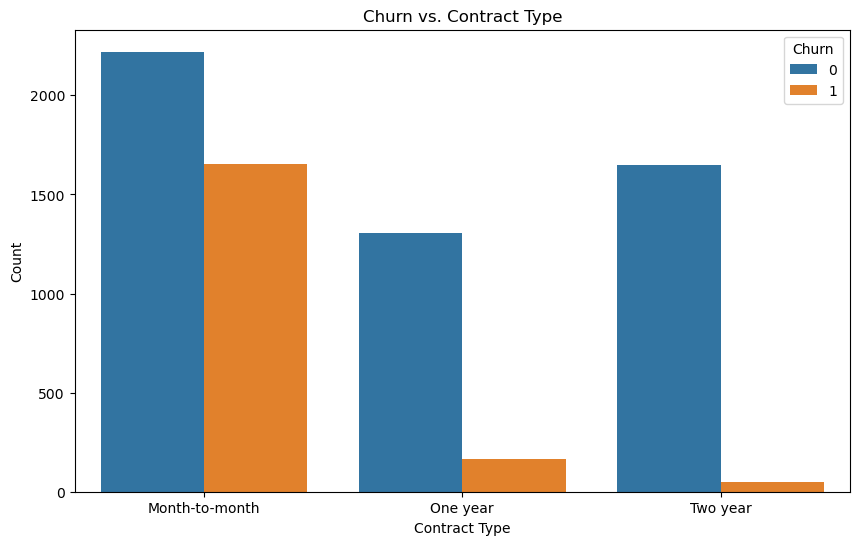

In [23]:
# Churn vs. Contract Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', data=df, hue='Churn')
plt.title('Churn vs. Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

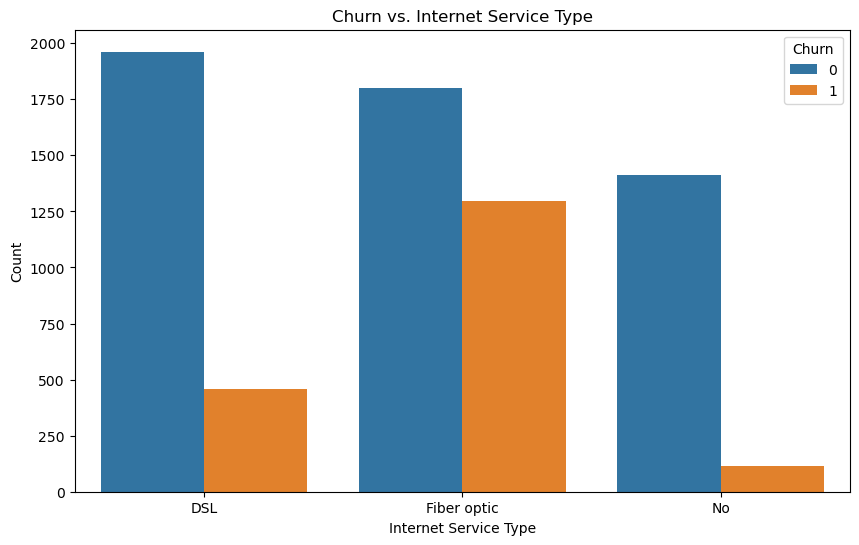

In [24]:
# Churn vs. Internet Service Type
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', data=df, hue='Churn')
plt.title('Churn vs. Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.show()

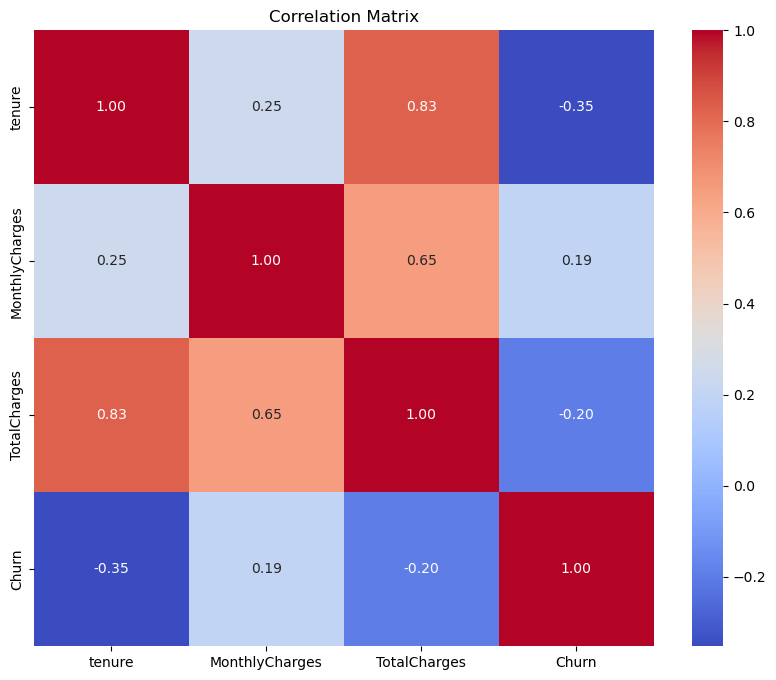

In [25]:
# Multivariate Analysis

# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


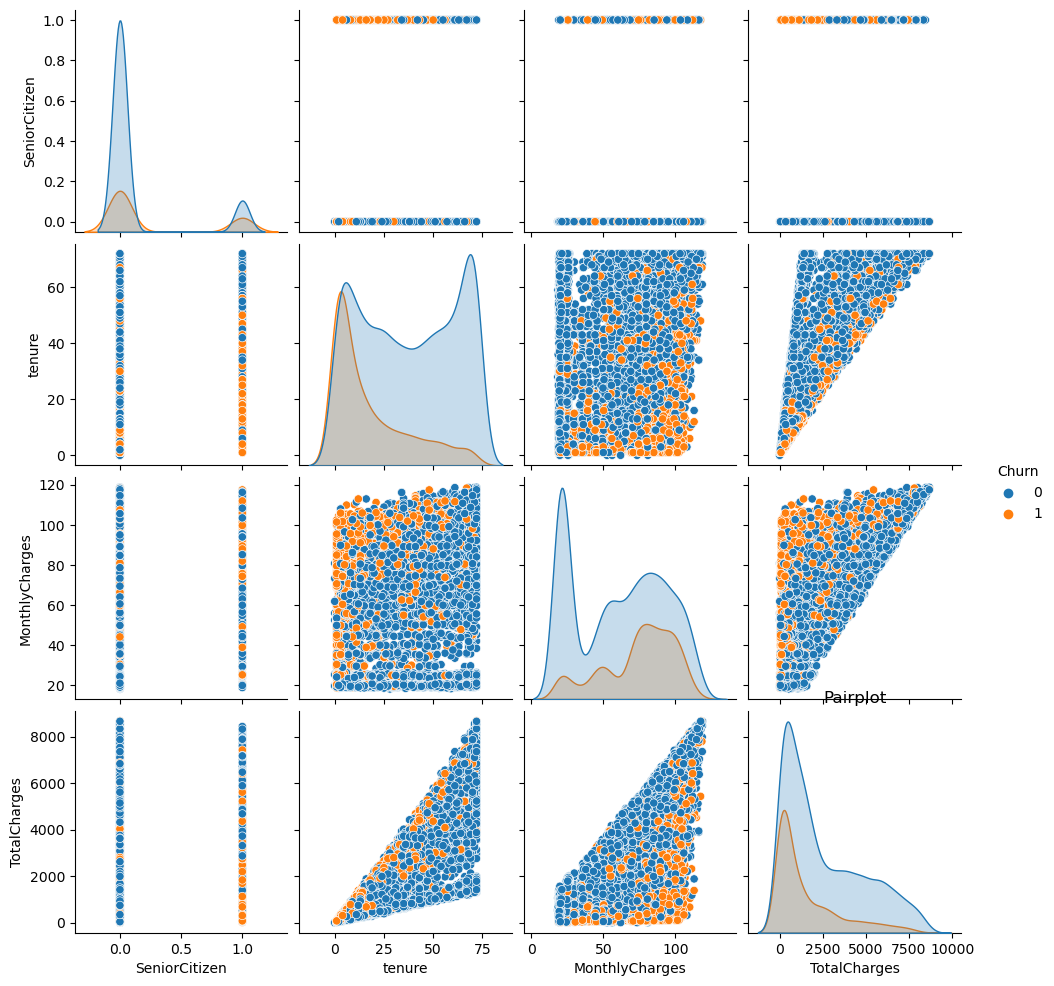

In [26]:
# Pairplot
sns.pairplot(df, hue='Churn', diag_kind='kde')
plt.title('Pairplot')
plt.show()

# 4. StratifiedShuffleSplit

In [27]:
# Create the StratifiedShuffleSplit object
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=64)

train_index, test_index = next(strat_split.split(df, df["Churn"]))

In [28]:
# Create train and test sets
strat_train_set = df.loc[train_index]
strat_test_set = df.loc[test_index]

In [29]:
X_train = strat_train_set.drop("Churn", axis=1)
y_train = strat_train_set["Churn"].copy()

In [30]:
X_test = strat_test_set.drop("Churn", axis=1)
y_test = strat_test_set["Churn"].copy()

# 5.Train Model

In [31]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [32]:
# Initialize and fit CatBoostClassifier
cat_model = CatBoostClassifier(verbose=False, random_state=0, scale_pos_weight=3)
cat_model.fit(X_train, y_train, cat_features=categorical_columns, eval_set=(X_test, y_test))

In [33]:
# Predict on test set
y_pred = cat_model.predict(X_test)

In [34]:
# Calculate evaluation metrics
accuracy, recall, roc_auc, precision = [round(metric(y_test, y_pred), 4) for metric in [accuracy_score, recall_score, roc_auc_score, precision_score]]

In [35]:
# Create a DataFrame to store results
model_names = ['CatBoost_Model']
result = pd.DataFrame({'Accuracy': accuracy, 'Recall': recall, 'Roc_Auc': roc_auc, 'Precision': precision}, index=model_names)

In [36]:
# Print results
print(result)

                Accuracy  Recall  Roc_Auc  Precision
CatBoost_Model    0.7764  0.8262   0.7923     0.5528


In [37]:
# Save the model in the 'model' directory
model_dir = "../model"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, "catboost_model.cbm")
cat_model.save_model(model_path)